Stories : articles CNN à résumer

In [3]:
import nltk
! python -m nltk.downloader all

/usr/local/Cellar/python@3.9/3.9.10/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/vincentjuge/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/vincentjuge/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/vincentjuge/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/vincen

In [1]:
from os import listdir

files_array = []

ROOT_DIR = './cnn/stories_keep/'
folder_content = listdir('./cnn/stories_keep')

for file in folder_content:
	with open(ROOT_DIR+file) as f:
		lines = [line.rstrip() for line in f.readlines()]
	files_array.append(str(lines))


In [48]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
filtre_stopw =  lambda text: [token.lower() for token in text if token.lower() not in stopwords]

tokenizer = nltk.RegexpTokenizer(r'\w+')

from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

def tokenize(doc):
	nltk.word_tokenize(doc)
	filtered = filtre_stopw(tokenizer.tokenize(doc))
	# nltk.FreqDist(filtered).most_common()
	return [stemmer.stem(s) for s in filtered] 


tokenized_array = list(map(tokenize, files_array))
print(len(tokenized_array))
# print(tokenized_array[0])
# print(tokenized_array[13])


190


<190x13410 sparse matrix of type '<class 'numpy.int64'>'
	with 57784 stored elements in Compressed Sparse Row format>

In [60]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer().fit(files_array)
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.")
vectorizer.vocabulary_.get('wire')


vectorizer.transform(['Something completely new.']).toarray()

from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer()
X = transformer.fit_transform(files_array)

transformer.get_feature_names_out()
print(X.shape)


(190, 13410)


(190, 2)


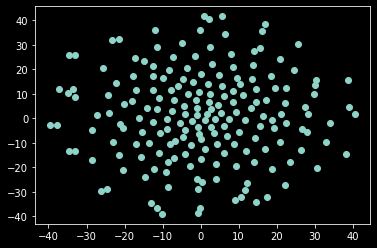

In [105]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
print(X_embedded.shape)

import matplotlib.pyplot as plt
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [25]:

test = files_array[0]
nltk.word_tokenize(test)

['[',
 "'",
 '(',
 'WIRED',
 ')',
 '--',
 'Two',
 'cable',
 'powerhouses',
 'have',
 'announced',
 'an',
 'ambitious',
 'pilot',
 'program',
 'that',
 'aims',
 'to',
 'convince',
 'their',
 'customers',
 'that',
 ',',
 'actually',
 ',',
 'TV',
 'on',
 'the',
 'web',
 'should',
 'not',
 'be',
 'free',
 '.',
 "'",
 ',',
 '``',
 ',',
 "'Jeffrey",
 'Bewkes',
 ',',
 'chairman',
 'and',
 'CEO',
 'of',
 'Time',
 'Warner',
 ',',
 'speaks',
 'at',
 'the',
 'NCTA',
 'conference',
 'in',
 'Washington',
 '.',
 "'",
 ',',
 '``',
 ',',
 "'With",
 'a',
 'service',
 'called',
 'TV',
 'Everywhere',
 ',',
 'Comcast',
 'and',
 'Time',
 'Warner',
 'will',
 'give',
 'cable',
 'subscribers',
 'access',
 'to',
 '``',
 'premium',
 "''",
 'television',
 'content',
 'via',
 'broadband',
 ',',
 'and',
 'later',
 'cellphone',
 'connections',
 '.',
 "'",
 ',',
 '``',
 ',',
 '``',
 'To',
 'begin',
 'with',
 ',',
 '5,000',
 'Comcast',
 'subscribers',
 'will',
 'begin',
 'testing',
 'the',
 'system',
 'next',
 'month

In [26]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize(test)

['WIRED',
 'Two',
 'cable',
 'powerhouses',
 'have',
 'announced',
 'an',
 'ambitious',
 'pilot',
 'program',
 'that',
 'aims',
 'to',
 'convince',
 'their',
 'customers',
 'that',
 'actually',
 'TV',
 'on',
 'the',
 'web',
 'should',
 'not',
 'be',
 'free',
 'Jeffrey',
 'Bewkes',
 'chairman',
 'and',
 'CEO',
 'of',
 'Time',
 'Warner',
 'speaks',
 'at',
 'the',
 'NCTA',
 'conference',
 'in',
 'Washington',
 'With',
 'a',
 'service',
 'called',
 'TV',
 'Everywhere',
 'Comcast',
 'and',
 'Time',
 'Warner',
 'will',
 'give',
 'cable',
 'subscribers',
 'access',
 'to',
 'premium',
 'television',
 'content',
 'via',
 'broadband',
 'and',
 'later',
 'cellphone',
 'connections',
 'To',
 'begin',
 'with',
 '5',
 '000',
 'Comcast',
 'subscribers',
 'will',
 'begin',
 'testing',
 'the',
 'system',
 'next',
 'month',
 'giving',
 'them',
 'access',
 'to',
 'Time',
 'Warner',
 's',
 'TBS',
 'and',
 'TNT',
 'channels',
 'on',
 'their',
 'computers',
 'and',
 'the',
 'same',
 'channels',
 'video',
 '

In [32]:
filtered = filtre_stopw( tokenizer.tokenize(test) )
filtered

['wired',
 'two',
 'cable',
 'powerhouses',
 'announced',
 'ambitious',
 'pilot',
 'program',
 'aims',
 'convince',
 'customers',
 'actually',
 'tv',
 'web',
 'free',
 'jeffrey',
 'bewkes',
 'chairman',
 'ceo',
 'time',
 'warner',
 'speaks',
 'ncta',
 'conference',
 'washington',
 'service',
 'called',
 'tv',
 'everywhere',
 'comcast',
 'time',
 'warner',
 'give',
 'cable',
 'subscribers',
 'access',
 'premium',
 'television',
 'content',
 'via',
 'broadband',
 'later',
 'cellphone',
 'connections',
 'begin',
 '5',
 '000',
 'comcast',
 'subscribers',
 'begin',
 'testing',
 'system',
 'next',
 'month',
 'giving',
 'access',
 'time',
 'warner',
 'tbs',
 'tnt',
 'channels',
 'computers',
 'channels',
 'video',
 'demand',
 'catalogs',
 'cable',
 'boxes',
 'made',
 'peace',
 'long',
 'ago',
 'idea',
 'paying',
 'monthly',
 'cable',
 'bill',
 'probably',
 'sounds',
 'great',
 'means',
 'watching',
 'existing',
 'subscription',
 'new',
 'screens',
 'without',
 'paying',
 'additional',
 'fees'

In [8]:
fd = nltk.FreqDist(filtered)
print(fd.most_common())

[('TV', 14), ('Everywhere', 13), ('cable', 10), ('Time', 9), ('Warner', 9), ('content', 9), ('Hulu', 9), ('television', 7), ('subscribers', 6), ('model', 6), ('Bewkes', 5), ('Comcast', 5), ('paying', 5), ('online', 5), ('program', 4), ('access', 4), ('internet', 4), ('highlight', 4), ('free', 3), ('give', 3), ('begin', 3), ('month', 3), ('subscription', 3), ('consumers', 3), ('watch', 3), ('represents', 3), ('programmers', 3), ('according', 3), ('able', 3), ('WIRED', 2), ('pilot', 2), ('chairman', 2), ('CEO', 2), ('called', 2), ('broadband', 2), ('cellphone', 2), ('testing', 2), ('system', 2), ('next', 2), ('giving', 2), ('channels', 2), ('probably', 2), ('new', 2), ('additional', 2), ('expect', 2), ('like', 2), ('alternative', 2), ('possible', 2), ('threat', 2), ('popular', 2), ('group', 2), ('networks', 2), ('pay', 2), ('However', 2), ('given', 2), ('business', 2), ('said', 2), ('want', 2), ('channel', 2), ('continue', 2), ('available', 2), ('added', 2), ('every', 2), ('single', 2), 

In [9]:
from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()

for w in filtered:
	print(stemmer.stem(w))

wire
two
cabl
powerhous
announc
ambiti
pilot
program
aim
convinc
custom
actual
tv
web
free
jeffrey
bewk
chairman
ceo
time
warner
speak
ncta
confer
washington
servic
call
tv
everywher
comcast
time
warner
give
cabl
subscrib
access
premium
televis
content
via
broadband
later
cellphon
connect
begin
5
000
comcast
subscrib
begin
test
system
next
month
give
access
time
warner
tbs
tnt
channel
comput
channel
video
demand
catalog
cabl
box
made
peac
long
ago
idea
pay
month
cabl
bill
probabl
sound
great
mean
watch
exist
subscript
new
screen
without
pay
addit
fee
buy
hardwar
cours
consum
adopt
tv
everywher
probabl
expect
price
increas
prefer
watch
televis
free
ad
support
site
like
hulu
pay
internet
connect
deliv
could
rude
awaken
tv
everywher
repres
altern
possibl
threat
popular
hulu
model
pilot
program
impress
group
prove
network
user
authent
system
secur
comcast
time
warner
expect
televis
programm
isp
mobil
provid
join
give
cabl
subscrib
way
watch
content
pay
televis
use
broadband
connect
comput


In [13]:
list(nltk.bigrams(filtered))

[('WIRED', 'Two'),
 ('Two', 'cable'),
 ('cable', 'powerhouses'),
 ('powerhouses', 'announced'),
 ('announced', 'ambitious'),
 ('ambitious', 'pilot'),
 ('pilot', 'program'),
 ('program', 'aims'),
 ('aims', 'convince'),
 ('convince', 'customers'),
 ('customers', 'actually'),
 ('actually', 'TV'),
 ('TV', 'web'),
 ('web', 'free'),
 ('free', 'Jeffrey'),
 ('Jeffrey', 'Bewkes'),
 ('Bewkes', 'chairman'),
 ('chairman', 'CEO'),
 ('CEO', 'Time'),
 ('Time', 'Warner'),
 ('Warner', 'speaks'),
 ('speaks', 'NCTA'),
 ('NCTA', 'conference'),
 ('conference', 'Washington'),
 ('Washington', 'service'),
 ('service', 'called'),
 ('called', 'TV'),
 ('TV', 'Everywhere'),
 ('Everywhere', 'Comcast'),
 ('Comcast', 'Time'),
 ('Time', 'Warner'),
 ('Warner', 'give'),
 ('give', 'cable'),
 ('cable', 'subscribers'),
 ('subscribers', 'access'),
 ('access', 'premium'),
 ('premium', 'television'),
 ('television', 'content'),
 ('content', 'via'),
 ('via', 'broadband'),
 ('broadband', 'later'),
 ('later', 'cellphone'),
 ('c

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
values = tfidf.fit_transform([test, test])
print(values)

  (0, 2)	0.25
  (0, 0)	0.25
  (0, 9)	0.25
  (0, 7)	0.25
  (0, 3)	0.5
  (0, 6)	0.25
  (0, 8)	0.25
  (0, 4)	0.25
  (0, 11)	0.25
  (0, 12)	0.25
  (0, 10)	0.25
  (0, 5)	0.25
  (0, 1)	0.25
  (1, 2)	0.25
  (1, 0)	0.25
  (1, 9)	0.25
  (1, 7)	0.25
  (1, 3)	0.5
  (1, 6)	0.25
  (1, 8)	0.25
  (1, 4)	0.25
  (1, 11)	0.25
  (1, 12)	0.25
  (1, 10)	0.25
  (1, 5)	0.25
  (1, 1)	0.25
